# MA934 Numerical Methods - Workbook 3

If you haven't already done so, install the DualNumbers Julia package. It is a good idea to update all your packages first. The commands are

>Pkg.update()

>Pkg.add("DualNumbers")

but you only need to run them once. 

In [6]:
using PyPlot
using DualNumbers

## Question 1: Numerical differentiation

**1))** Derive a finite difference formula for the derivative of a function, $f$ at a point $x$ using the 3-point stencil $(x, x+h, x+2h)$ and state the order of the approximation error in terms of $h$.

**2)** Write a formula for the derivative, $f^\prime(x)$, of the function

$$f(x) = \sin(\exp(x)) $$

and evaluate it at $x=1$.

**3)** Use your finite difference formula to approximate the value of $f^\prime(1)$ for values of $h$ decreasing from $2^{-1}$ to $2^{-30}$ in powers of $2$. Plot the error as a function of $h$ and verify the theoretically predicted scaling of the error with $h$. What is the best relative error you can achieve?

**4)** Read the examples at https://github.com/JuliaDiff/DualNumbers.jl. Define a dual number $x = 1+\epsilon$ and use it to evaluate $f^\prime(1)$. Verify that the answer is accurate to within machine precision.

## Analytical solutions

From Taylor's theorem

\begin{align*}
    f(x_{i+1})=f(x_{i}+h) &= f(x_{i}) + hf'(x_{i})+\frac{h^{2}}{2}f''(x_{i}) + O(h^{3}) \\
    f(x_{i+2})=f(x_{i}+2h) &= f(x_{i}) + 2hf'(x_{i})+\frac{4h^{2}}{2}f''(x_{i})+O(h^{3})
\end{align*}

Now we consider the linear combination

\begin{align*}
    a_{1}f(x_{i})+a_{2}f(x_{i+1})+a_{3}f(x_{i+2}) = (a_{1}+a_{2}+a_{3})f(x_{i}) + (a_{2}+2a_{3})hf'(x_{i})+(a_{2}+4a_{3})\frac{h^{2}}{2}f''(x_{i})+O(h^{3})
\end{align*}

We want $f'(x_{i})$ so we solve the system

\begin{align*}
    a_{1}+a_{2}+a_{3} &= 0 \\
    a_{2}+2a_{3} &= 1 \\
    a_{2}+4a_{3} &= 0
\end{align*}

The solution is $a_{1}=-\frac{3}{2}, a_{2}=2, a_{3}=-\frac{1}{2}$. Hence we obtain

\begin{align*}
    -\frac{3}{2}f(x_{i})+2f(x_{i+1})-\frac{1}{2}f(x_{i+2}) = hf'(x_{i})+O(h^{3}) 
    \Rightarrow f'(x_{i}) = \frac{4f(x_{i+1})-3f(x_{i})-f(x_{i+2})}{2h}+O(h^{2})
\end{align*}

The derivative is

\begin{align*}
    f(x) = \sin{e^{x}} \Rightarrow f'(x) = e^{x}\cos{e^{x}}
\end{align*}

In [27]:
include("modules/numerics.jl");

The above file includes functions to implement $f(x)$ and derivatives as well as the 3-stencil finite difference, bracket-bisection, Newton Raphson, and the Golden search. The signatures are:

the function in the question sin(exp(x))
f(x)

first derivative
f¹(x)

uses BigFloat arithmetic
fb(x) 
fb¹(x)

f²(x)
second derivative

finite_difference_3(f::Function,x,h)
computes the 3 stencil finite difference as above on the function f
and evaluates at x with step h between points

bracket_bisection(f::Function,a,b,ϵ=eps())
implements the bracket-bisection root finding method on f starting 
with the initial bracketing interval $[a,b]$. tolerence is Float64
machine epsilon by default.

newton_raphson(f::Function,f¹::Function,x,ϵ=eps())
implements the Newton Raphson root finding method on f starting 
with the initial guess x. tolerence is Float64
machine epsilon by default.

golden_search(f::Function,BR::Array{Float64,1}, ϵ=eps())
finds the local minimum of f using the golden-section search algorithm.

(NB1) Initial minimum bracketing interval $BR = [a,b,c]$ where $a<c<b$.

(NB2) The last 3 functions all return the root or minimum (whichever is applicable) and the error at each step in vector form.

## Value of $f'(1)$

In [28]:
println(f¹(1))

-2.478349732955235


## Finite difference

The 3-point finite difference on $f(x)$ at $1$ with step $h=0.01$ has
the error as shown below, and is about $0.01^{2}$

In [29]:
println("3-stencil finite difference error = ",abs(finite_difference_3(f,1,0.01)-f¹(1)))

3-stencil finite difference error = 0.00025201174088351763


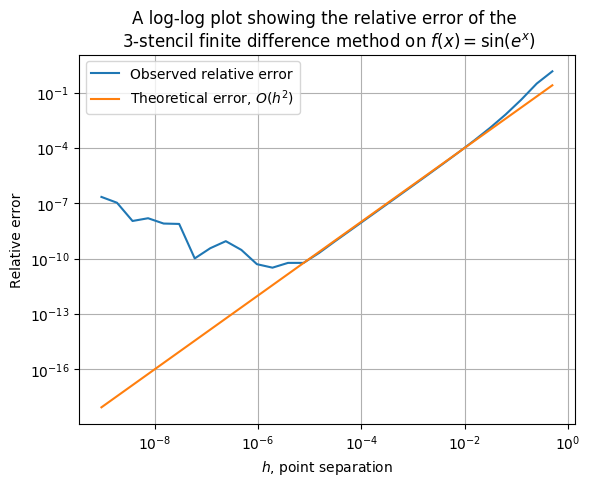

Best relative error: 3.2358045918081733e-11


In [30]:
H = []
for i in 1:30
    append!(H,2.0^(-i))
end

Exact = f¹(BigFloat(1))
FD = zeros(length(H));

for i in 1:length(H)
    FD[i] = finite_difference_3(f,1.0,H[i])
end

figure(1)
plot(H, abs((FD-Exact)./Exact), label="Observed relative error")
loglog(H,H.^2, label="Theoretical error, "L"O(h^{2})")
title("A log-log plot showing the relative error of the \n 3-stencil finite difference method on "L"f(x) = \sin(e^{x})")
xlabel(L"h"", point separation")
ylabel("Relative error")
println("Best relative error: ", minimum(abs((FD-Exact)./Exact)))
legend()
grid()

This best error is a few orders of magnitude greater than the machine epsilon for Float64, which is

In [31]:
println("Mahcine epsilon (Float64), ϵₘ = ", eps())

Mahcine epsilon (Float64), ϵₘ = 2.220446049250313e-16


The dual part of $f(Dual(x))$ gives the derivative when evaluated, as shown below. It appears to be lower than the machine epsilon for Float64

In [32]:
# Dual128 gives Dual(Float64,Float64)
# just being explicit
x = Dual128(1.0,1.0)
f(x)
derivative = dualpart(f(x))
println("Error: ", Float64(abs((Exact-derivative)/Exact)))

Error: 1.4835229507361194e-17


## Further questions

I have left these in the notbook because I did them before Friday's class where we decided on what is examinable.

## Question 2: Finding roots

**1)** Referring to the function, $f(x)$, defined above, find the roots of the equation

$$ f(x) = 0$$

in the interval $0<x<2$.

**2)** Implement the bracketing and bisection method to find one of the roots numerically. Measure the error at each iteration of the algorithm and demonstrate that the error decreases exponentially as a function of the number of iterations. To how many digits of precision can you approximate the root?

**3)** Perform the same measurements for the Newton Raphson method and show that the error decreases faster than exponentially as a function of the number of iterations.

For $x\in(0,2)$ the function $f(x) = \sin(e^{x})$ has the roots
$x_{1},x_{2} = \ln(\pi), \ln(2\pi)$.

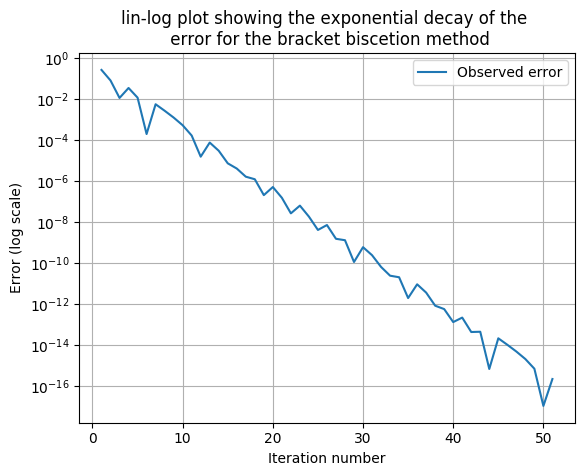

Root: 1.1447298858494004
Best Error: 1.0265951162707826e-17


PyObject <matplotlib.legend.Legend object at 0x7f746f125fd0>

In [41]:


root, error = bracket_bisection(f,0.5,1.25);
x = 1:1:length(error)

semilogy(x,error, label="Observed error")

println("Root: ", root)

println("Best Error: ", Float64(minimum(error)))
title("lin-log plot showing the exponential decay of the \n error for the bracket biscetion method")
xlabel("Iteration number")
ylabel("Error (log scale)")
grid()
legend()

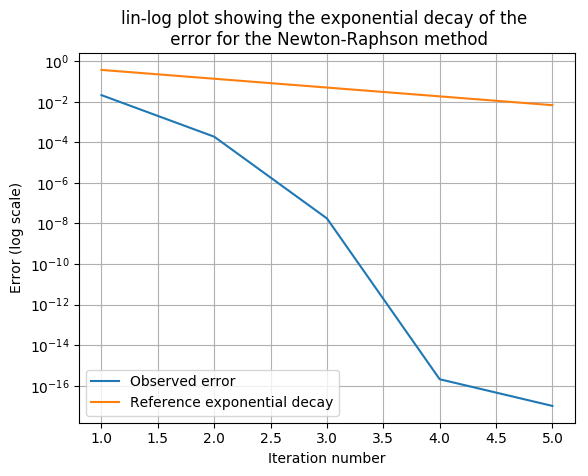

Best Error: 1.0265951162707826e-17


PyObject <matplotlib.legend.Legend object at 0x7f746f22da50>

In [40]:
root, error = newton_raphson(f,f¹,1.0)

n = 1:1:length(error)

semilogy(n,error, label="Observed error")
semilogy(n,exp(-n), label="Reference exponential decay")

println("Best Error: ", Float64(minimum(error)))
title("lin-log plot showing the exponential decay of the \n error for the Newton-Raphson method")
xlabel("Iteration number")
ylabel("Error (log scale)")
grid()
legend()

## Question 3: Finding minima

**1)** The function $f(x)$ above has a single minimum in the interval $0<x<2$. Find its location analytically.

**2)** Implement the Golden section search to find the location of this minimum numerically. Plot the error as a function of the number of iterations. To how many digits of precision can you approximate the location of the minimum?

**3)** To understand your empirical findings, use Taylor's Theorem to show that near a minimum, $x_*$, of f(x),

$$f(x) \approx f(x_*)\left( 1+ \frac{f^{\prime\prime}(x_*)}{2\,f(x_*)}\,(x-x_*)^2\right). $$
Show that in order for a computer to distinguish between $f(x)$ and $f(x_*)$ we must have

$$ \left| x-x_*\right| > \sqrt{\epsilon_m}\,\sqrt{\left|\frac{2\,f(x_*)}{f^{\prime\prime}(x_*)}\right|}$$

thus limiting the precision with which the location of a minimum can be determined.

The function $f(x)=\sin(e^{x})$ has the first and second derivatives

\begin{align*}
    f'(x) = e^{x}\cos{e^{x}}, \enspace f''(x) = e^{x}\cos{e^{x}}-\sin{e^{x}}e^{2x}
\end{align*}

For the minimum, in the interval $(0,2)$, we need $f'(x)=0\Rightarrow x=\ln(\pi/2),\ln(3\pi/2)$, and also $f''(x)>0$ so the minimum point must be $x_{min}=\ln(3\pi/2)$. 

Below is a plot to find a good guess at a minimum bracketing range.

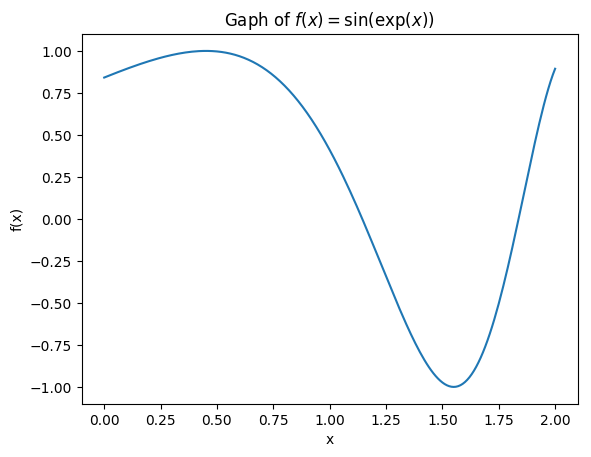

PyObject <matplotlib.text.Text object at 0x7f746f07c250>

In [43]:
x = 0:0.01:2
plot(x,f(x))
# hence bracketing region of [1.0 1.9 1.75]
title("Gaph of "L"f(x)=\sin(\exp(x))")
xlabel("x")
ylabel("f(x)")

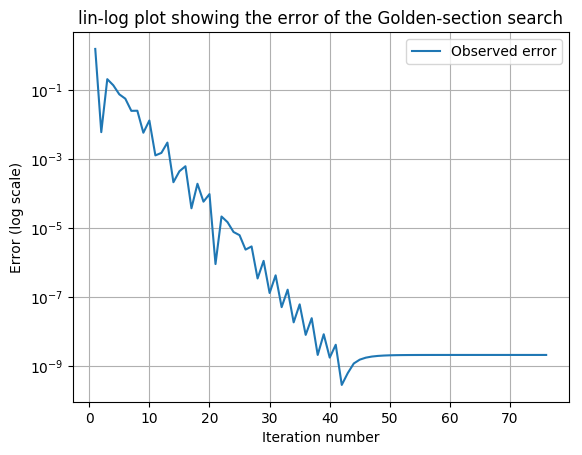

Minimum point: 1.55019499609821
Best error: 2.140642805747952e-9


In [51]:
BR = [1.0, 1.9, 1.89]
m,error = golden_search(f,BR)

x = 1:1:length(error)

semilogy(x,error, label="Observed error")
title("lin-log plot showing the error of the Golden-section search")
legend()
grid()
xlabel("Iteration number")
ylabel("Error (log scale)")
println("Minimum point: ", m)
# I don't believe the minimum is actually the minimum error
# because it is order 1e-10, below the theory...
# so I'm assuming I should quote the value at the
# flattened line?
println("Best error: ", Float64(error[70]))

To explain this consider Taylor's theorem and set $\eta = x-x^{*}$ where $x^{*}$ satisfies $f'(x^{*})=0,f''(x^{*})>0$ (i.e a minimum of $f$). Since $\eta+x^{*}=x$ we find

\begin{align*}
    f(\eta+x^{*}) &= f(x^{*})+f'(x^{*})\eta + \frac{\eta^{2}}{2}f''(x^{*})+O(\eta^{3})
        = f(x^{*})+\frac{\eta^{2}}{2}f''(x^{*})+O(\eta^{3}) \\
        &\Rightarrow f(\eta+x^{*}) = f(x^{*})\biggl(1+\frac{f''(x^{*})}{2f(x^{*})}\eta^{2}\biggr)+O(\eta^{3}) 
\end{align*}

Now using $\eta+x^{*}=x$ and $\eta=x-x^{*}$ we find the approximation

\begin{align*}
    f(x) \approx f(x^{*})\biggl(1+\frac{f''(x^{*})}{2f(x^{*})}(x-x^{*})^{2}\biggr)
\end{align*}

Now we define the machine epsilon as $\epsilon_{m}$ where for the machine to differentiate $f(x),f(x^{*})$ we must have

\begin{align*}
    \biggl|\frac{f(x)-f(x^{*})}{f(x^{*})}\biggr| > \epsilon_{m}
\end{align*}

Therefor using our approximation we find

\begin{align*}
    |f(x)-f(x^{*})| > \epsilon_{m} &\Rightarrow \frac{\biggl|f(x^{*})\biggl(1+\frac{f''(x^{*})}{2f(x^{*})}(x-x^{*})^{2}\biggr)-f(x^{*})\biggr|}{\bigl|f(x^{*})\bigr|}>\epsilon_{m} \\
    &\Rightarrow \biggl|\frac{f''(x^{*})}{2f(x^{*})}(x-x^{*})^{2}\biggr|>\epsilon_{m} \Rightarrow \biggl|\frac{f''(x^{*})}{2f(x^{*})}\biggr|\bigl|(x-x^{*})^{2}\bigr|
\end{align*}

Now since $\sqrt{|x^{2}|} = \sqrt{x^{2}} = |x|$ we can write

\begin{align*}
    \sqrt{\biggl|\frac{f''(x^{*})}{2f(x^{*})}\biggr|}\bigl|x-x^{*}\bigr| > \epsilon_{m} \Rightarrow \bigl|x-x^{*}\bigr| > \sqrt{\epsilon_{m}}\sqrt{\frac{2f(x^{*})}{f''(x^{*})}}
\end{align*}
    
Now using this formula below we find the bound is of order $O(10^{-9})$, which is about the same as the best error in the Golden-section search above.
    


In [124]:
k = log(3*pi/2.0)
l = sqrt(eps())*sqrt(abs((2.0.*f.(k))/(f².(k))))

4.471919517502715e-9